Name: Jaideep Reddy 
<br>
Submitted on: 07/17/2019

##### Reading the data

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [205]:
filename = 'InputMatrix_v2.1.h5'
mydf=pd.read_hdf(filename,'df')

In [4]:
type(mydf)

pandas.core.frame.DataFrame

In [5]:
mydf.head()

,Person.Id,mo1_Chronic.Diseases,mo1_Gaps.In.Care.Count,mo1_Avg.HCC.Risk,mo1_Average.Monthly.Cost,mo1_Total.Cost,mo1_Hospital.Admissions,mo1_Re.Admissions,mo1_ER.Admissions,mo1_ER.Visits,...,mv_avg_index_mtl_Office.Visits,exp_mv_avg_mtl_Cost,simple_mv_avg_mtl_Cost,mv_avg_index_mtl_Cost,exp_mv_avg_mtl_ER.Visits,simple_mv_avg_mtl_ER.Visits,mv_avg_index_mtl_ER.Visits,exp_mv_avg_mtl_Hospital.Admissions,simple_mv_avg_mtl_Hospital.Admissions,mv_avg_index_mtl_Hospital.Admissions
0,145823601,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,145823601,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,145823601,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,145823601,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,69593425,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Dropping duplicate rows

In [6]:
mydf['Person.Id'].describe()

count         360985
unique        112697
top       456564981A
freq               4
Name: Person.Id, dtype: object

In [7]:
## from the summary above we can see that there are a lot of duplicate records

In [8]:
mydf.duplicated().describe()

count     360985
unique         1
top        False
freq      360985
dtype: object

In [9]:
mydf.duplicated('Person.Id')

0         False
1          True
2          True
3          True
4         False
5          True
6          True
7          True
8         False
9          True
10         True
11         True
12        False
13         True
14         True
15         True
16        False
17         True
18         True
19         True
20        False
21         True
22         True
23         True
24        False
25         True
26         True
27         True
28        False
29         True
          ...  
360955    False
360956    False
360957    False
360958    False
360959    False
360960    False
360961    False
360962    False
360963    False
360964    False
360965    False
360966    False
360967    False
360968    False
360969    False
360970    False
360971    False
360972    False
360973    False
360974    False
360975    False
360976    False
360977    False
360978    False
360979    False
360980    False
360981    False
360982    False
360983    False
360984    False
Length: 360985, dtype: b

In [9]:
mydf=mydf.drop_duplicates('Person.Id',keep='last')

In [10]:
list(mydf.columns)

['Person.Id',
 'mo1_Chronic.Diseases',
 'mo1_Gaps.In.Care.Count',
 'mo1_Avg.HCC.Risk',
 'mo1_Average.Monthly.Cost',
 'mo1_Total.Cost',
 'mo1_Hospital.Admissions',
 'mo1_Re.Admissions',
 'mo1_ER.Admissions',
 'mo1_ER.Visits',
 'mo1_Post.Discharge.PCP.Visits',
 'mo1_Post.Discharge.Specialist.Visits',
 'mo1_Avg.LOSdays.per.hospital.admissions',
 'mo1_EMERGENCYROOMHOSPITAL_Cost',
 'mo1_INPATIENTHOSPITAL_Cost',
 'mo1_OFFICE_Cost',
 'mo1_OUTPATIENTHOSPITAL_Cost',
 'mo1_PHARMACY_Cost',
 'mo1_ESRD_Cost',
 'mo1_SNF_Cost',
 'mo1_HOME_Cost',
 'mo1_URGENT_CARE_Cost',
 'mo1_INPATIENT_PSYCHIATRIC_Cost',
 'mo1_AMBULATORY_SURGICAL_CENTER_Cost',
 'mo1_mtl_Cost',
 'mo1_mtl_ER.Visits',
 'mo1_mtl_ER.Admissions',
 'mo1_mtl_Hospital.Admissions',
 'mo1_mtl_ReAdmissions',
 'mo1_mtl_Office.Visits',
 'mo1_Unique_CPT',
 'mo1_Total_CPT',
 'mo1_dialysis',
 'mo1_NDC',
 'mo1_nitrates',
 'mo1_nitrates_Cost',
 'mo1_opioid',
 'mo1_opioid_Cost',
 'mo1_warfarin',
 'mo1_warfarin_Cost',
 'mo1_antidepression',
 'mo1_antidep

In [10]:
mydf.shape

(112697, 518)

In [11]:
mydf['Target_ER.Events'].describe()

count    112697.000000
mean          0.414776
std           1.152025
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          59.000000
Name: Target_ER.Events, dtype: float64

In [12]:
mydf.dtypes.value_counts()

float64           487
int64              28
object              2
datetime64[ns]      1
dtype: int64

##### Binning the Target Variable

In [99]:
mydf.loc[mydf['Target_ER.Events'] >0, 'Target_ER.Events'] = 1
mydf['Target_ER.Events']=mydf['Target_ER.Events'].astype('category')
mydf['Target_ER.Events'].describe()

count     360985.0
unique         2.0
top            0.0
freq      272049.0
Name: Target_ER.Events, dtype: float64

##### Correlation matrix

In [100]:
temp_df=mydf.copy()

In [101]:
corr_mat=temp_df.corr().abs()

In [102]:
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))

In [103]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

In [105]:
len(to_drop)

183

##### Dropping correlated variables

In [106]:
req_col=set(temp_df.columns)-set(to_drop)

In [107]:
req_list=list(req_col)
temp_df=temp_df[req_list]

##### List of dropped columns

In [108]:
to_drop

['mo1_Avg.HCC.Risk',
 'mo1_Total.Cost',
 'mo1_ER.Admissions',
 'mo1_Post.Discharge.PCP.Visits',
 'mo1_Post.Discharge.Specialist.Visits',
 'mo1_mtl_Hospital.Admissions',
 'mo1_Total_CPT',
 'mo2_Chronic.Diseases',
 'mo2_Gaps.In.Care.Count',
 'mo2_Avg.HCC.Risk',
 'mo2_ESRD_Cost',
 'mo2_mtl_Cost',
 'mo2_mtl_Hospital.Admissions',
 'mo2_Total_CPT',
 'mo2_dialysis',
 'mo3_Chronic.Diseases',
 'mo3_Gaps.In.Care.Count',
 'mo3_Avg.HCC.Risk',
 'mo3_ESRD_Cost',
 'mo3_mtl_Cost',
 'mo3_mtl_Hospital.Admissions',
 'mo3_Total_CPT',
 'mo3_dialysis',
 'mo3_NDC',
 'mo4_Chronic.Diseases',
 'mo4_Gaps.In.Care.Count',
 'mo4_Avg.HCC.Risk',
 'mo4_ESRD_Cost',
 'mo4_HOME_Cost',
 'mo4_mtl_Cost',
 'mo4_mtl_Hospital.Admissions',
 'mo4_Total_CPT',
 'mo4_dialysis',
 'mo4_NDC',
 'mo4_opioid_Cost',
 'mo5_Chronic.Diseases',
 'mo5_Gaps.In.Care.Count',
 'mo5_Avg.HCC.Risk',
 'mo5_ESRD_Cost',
 'mo5_HOME_Cost',
 'mo5_mtl_Cost',
 'mo5_mtl_Hospital.Admissions',
 'mo5_Total_CPT',
 'mo5_dialysis',
 'mo5_NDC',
 'mo5_opioid_Cost',
 

##### List of columns that are used for model building

In [109]:
req_list

['mo11_warfarin',
 'mo9_OFFICE_Cost',
 'mo9_PHARMACY_Cost',
 'mo12_HIV',
 'mo4_OFFICE_Cost',
 'mo12_SNF_Cost',
 'mo10_INPATIENT_PSYCHIATRIC_Cost',
 'mo3_nitrates',
 'mo5_INPATIENT_PSYCHIATRIC_Cost',
 'mo11_mtl_ER.Admissions',
 'mo4_INPATIENTHOSPITAL_Cost',
 'mo7_mtl_Office.Visits',
 'mo3_SNF_Cost',
 'mo4_SNF_Cost',
 'mo1_PHARMACY_Cost',
 'mo5_INPATIENTHOSPITAL_Cost',
 'mo11_opioid',
 'mo12_Depression',
 'mv_avg_index_Chronic.Diseases',
 'mo12_nitrates',
 'mo6_mtl_ER.Visits',
 'mo10_URGENT_CARE_Cost',
 'mo2_EMERGENCYROOMHOSPITAL_Cost',
 'mo12_Osteoporosis.Risk',
 'mo9_opioid',
 'mo12_CHF',
 'mo3_INPATIENTHOSPITAL_Cost',
 'mo7_warfarin_Cost',
 'mo7_HOME_Cost',
 'mo1_warfarin',
 'mo5_AMBULATORY_SURGICAL_CENTER_Cost',
 'mo6_PHARMACY_Cost',
 'mo12_OFFICE_Cost',
 'mo12_mtl_Office.Visits',
 'mo7_antidepression',
 'mo7_nitrates',
 'mo12_Arthritis',
 'mo10_SNF_Cost',
 'mo1_INPATIENT_PSYCHIATRIC_Cost',
 'mo4_mtl_Office.Visits',
 'mo10_warfarin_Cost',
 'mo9_mtl_ER.Visits',
 'mo2_OFFICE_Cost',
 'm

In [110]:
temp_df.shape

(360985, 335)

In [111]:
colarr=mydf.columns

In [112]:
for i in range(0,len(colarr)):                      ### finding the column with datetime datatype
    if mydf[colarr[i]].dtypes=='datetime64[ns]':
        print(colarr[i])

min_YrMo


In [113]:
for i in range(0,len(colarr)):                  
    if mydf[colarr[i]].dtypes=='object':
        print(colarr[i])

Person.Id
mo12_Gender


In [114]:
temp_df=temp_df.drop('min_YrMo',axis=1)

In [115]:
temp_df=temp_df.drop('Person.Id',axis=1)

In [116]:
temp_df=temp_df.drop('dataYr',axis=1)

##### Dummy variables for mo12_Gender

In [117]:
temp_df['mo12_Gender']=temp_df['mo12_Gender'].astype('category')

In [118]:
dummies = pd.get_dummies(temp_df['mo12_Gender']).rename(columns=lambda x: 'mo12_Gender' + str(x))

In [119]:
temp_df=pd.concat([temp_df,dummies],axis=1)

In [120]:
temp_df=temp_df.drop('mo12_Gender',axis=1)

##### Standardizing the numeric variables

In [121]:
temp_df.dtypes.value_counts()

float64     326
int64         4
uint8         3
category      1
dtype: int64

In [122]:
from sklearn import preprocessing

In [123]:
scaler = preprocessing.StandardScaler()

In [124]:
numeric_df=temp_df.loc[:,~temp_df.columns.isin(['Target_ER.Events','mo12_GenderF','mo12_GenderM','mo12_GenderU'])]

In [125]:
cat_df=temp_df.loc[:,temp_df.columns.isin(['Target_ER.Events','mo12_GenderF','mo12_GenderM','mo12_GenderU'])]

In [126]:
scaled_df = scaler.fit_transform(numeric_df)

##### Saving the mean and variance of the dataset for future test instances

In [127]:
std_features=scaler.fit(numeric_df)

In [128]:
# std_features is an array containing the mean and variance for each column in the dataset
# and is used for standardising the test instances

In [129]:
scaled_df=pd.DataFrame(scaled_df,columns=numeric_df.columns)

In [130]:
scaled_df.shape

(360985, 330)

In [131]:
cat_df.index=range(len(cat_df))

In [132]:
cat_df.shape

(360985, 4)

In [133]:
final_scaled_df=pd.concat([scaled_df,cat_df],axis=1)

In [134]:
final_scaled_df.shape

(360985, 334)

In [135]:
scaled_df.describe()

,mo11_warfarin,mo9_OFFICE_Cost,mo9_PHARMACY_Cost,mo12_HIV,mo4_OFFICE_Cost,mo12_SNF_Cost,mo10_INPATIENT_PSYCHIATRIC_Cost,mo3_nitrates,mo5_INPATIENT_PSYCHIATRIC_Cost,mo11_mtl_ER.Admissions,...,mo8_mtl_ER.Admissions,Target_ReAdmissions,mo4_opioid,mo12_Months.Since.Serum.Creatinine.Exam,mo5_OUTPATIENTHOSPITAL_Cost,mo4_warfarin_Cost,mo3_INPATIENT_PSYCHIATRIC_Cost,mo2_mtl_ReAdmissions,mo2_antidepression_Cost,mo8_warfarin_Cost
count,3.609850e+05,3.609850e+05,3.609850e+05,3.609850e+05,3.609850e+05,3.609850e+05,3.609850e+05,3.609850e+05,3.609850e+05,3.609850e+05,...,3.609850e+05,3.609850e+05,3.609850e+05,3.609850e+05,3.609850e+05,3.609850e+05,3.609850e+05,3.609850e+05,3.609850e+05,3.609850e+05
mean,-1.435456e-13,-1.013886e-13,-3.596514e-14,-4.496086e-15,-6.537801e-15,1.080033e-15,-5.214866e-15,-2.405751e-14,-8.446313e-15,2.654714e-14,...,-8.414477e-14,7.940423e-14,2.580580e-13,1.196198e-14,3.637898e-14,-2.082297e-14,-1.622016e-14,1.945163e-14,4.156339e-14,1.512534e-14
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-6.530563e-02,-1.083211e+00,-2.597622e+00,-3.816376e-02,-1.162675e+00,-5.395010e-01,-1.077900e-02,-5.079522e-02,-1.080220e-02,-8.418598e-02,...,-8.135433e-02,-8.481192e-02,-1.984591e-01,-4.742378e-01,-3.457721e+00,-1.488103e+00,-1.099021e-02,-3.198166e-02,-8.870966e-01,-4.007952e+00
25%,-6.530563e-02,-1.609067e-01,-8.695502e-02,-3.816376e-02,-1.644076e-01,-6.442307e-02,-1.077900e-02,-5.079522e-02,-1.080220e-02,-8.418598e-02,...,-8.135433e-02,-8.481192e-02,-1.984591e-01,-4.742378e-01,-8.589053e-02,-3.527260e-02,-1.099021e-02,-3.198166e-02,-5.527268e-02,-3.461546e-02
50%,-6.530563e-02,-1.609067e-01,-8.695502e-02,-3.816376e-02,-1.644076e-01,-6.442307e-02,-1.077900e-02,-5.079522e-02,-1.080220e-02,-8.418598e-02,...,-8.135433e-02,-8.481192e-02,-1.984591e-01,-4.742378e-01,-8.589053e-02,-3.527260e-02,-1.099021e-02,-3.198166e-02,-5.527268e-02,-3.461546e-02
75%,-6.530563e-02,-5.651429e-02,-8.457304e-02,-3.816376e-02,-5.593844e-02,-6.442307e-02,-1.077900e-02,-5.079522e-02,-1.080220e-02,-8.418598e-02,...,-8.135433e-02,-8.481192e-02,-1.984591e-01,-1.809519e-01,-8.589053e-02,-3.527260e-02,-1.099021e-02,-3.198166e-02,-5.527268e-02,-3.461546e-02
max,1.531262e+01,1.156729e+02,1.709695e+02,2.620287e+01,9.719701e+01,7.527538e+01,2.249904e+02,1.968689e+01,2.449237e+02,3.206307e+01,...,5.558145e+01,9.798298e+01,5.038821e+00,4.390035e+00,1.306814e+02,1.311109e+02,2.493639e+02,1.222657e+02,1.386770e+02,1.773637e+02


##### Scatter plots to find correlation between target and predictors

In [136]:
exp_df=final_scaled_df

In [52]:
exp_df['Target_ER.Visits'].describe()

count    1.126970e+05
mean    -3.655393e-14
std      1.000004e+00
min     -3.422287e-01
25%     -3.422287e-01
50%     -3.422287e-01
75%     -3.422287e-01
max      5.800755e+01
Name: Target_ER.Visits, dtype: float64

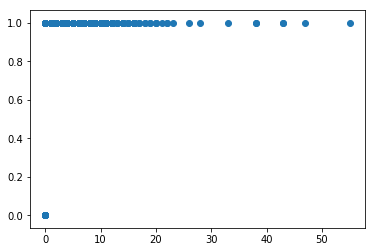

In [53]:
plt.scatter(mydf['Target_ER.Visits'],mydf['Target_ER.Events'])

In [54]:
### from the above graph you can see they are 1 for 1

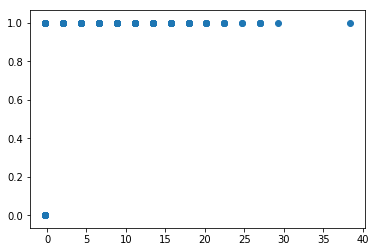

In [55]:
plt.scatter(exp_df['Target_ER.Admissions'],exp_df['Target_ER.Events'])

In [56]:
### the same for this graph too

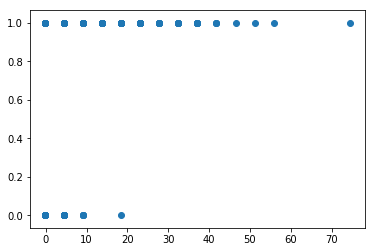

In [57]:
plt.scatter(exp_df['Target_ReAdmissions'],exp_df['Target_ER.Events'])

In [137]:
final_scaled_df=final_scaled_df.drop('Target_ER.Admissions',axis=1)
final_scaled_df=final_scaled_df.drop('Target_ER.Visits',axis=1)
final_scaled_df=final_scaled_df.drop('Target_ReAdmissions',axis=1)
final_scaled_df=final_scaled_df.drop('Target_Total_Cost',axis=1)

In [138]:
final_scaled_df['Target_ER.Events'].describe()

count     360985.0
unique         2.0
top            0.0
freq      272049.0
Name: Target_ER.Events, dtype: float64

In [140]:
final_scaled_df['Target_ER.Events'].value_counts(normalize=True) * 100

0.0    75.362965
1.0    24.637035
Name: Target_ER.Events, dtype: float64

In [61]:
final_scaled_df.head()

,mo11_warfarin,mo9_OFFICE_Cost,mo9_PHARMACY_Cost,mo12_HIV,mo4_OFFICE_Cost,mo12_SNF_Cost,mo10_INPATIENT_PSYCHIATRIC_Cost,mo3_nitrates,mo5_INPATIENT_PSYCHIATRIC_Cost,mo11_mtl_ER.Admissions,...,mo5_OUTPATIENTHOSPITAL_Cost,mo4_warfarin_Cost,mo3_INPATIENT_PSYCHIATRIC_Cost,mo2_mtl_ReAdmissions,mo2_antidepression_Cost,mo8_warfarin_Cost,Target_ER.Events,mo12_GenderF,mo12_GenderM,mo12_GenderU
0,-0.0605,-0.149753,-0.083391,-0.038868,-0.144728,-0.067464,-0.010444,-0.054192,-0.010375,-0.082361,...,-0.081003,-0.034544,-0.010325,-0.032116,-0.054829,-0.029509,0.0,0,0,1
1,-0.0605,-0.149753,-0.083391,-0.038868,-0.144728,-0.067464,-0.010444,-0.054192,-0.010375,-0.082361,...,-0.081003,-0.034544,-0.010325,-0.032116,-0.054829,-0.029509,0.0,0,0,1
2,-0.0605,-0.149753,-0.083391,-0.038868,-0.144728,-0.067464,-0.010444,-0.054192,-0.010375,-0.082361,...,-0.081003,-0.034544,-0.010325,-0.032116,-0.054829,-0.029509,0.0,0,0,1
3,-0.0605,-0.149753,-0.083391,-0.038868,-0.063267,-0.067464,-0.010444,-0.054192,-0.010375,-0.082361,...,-0.081003,-0.034544,-0.010325,-0.032116,-0.054829,-0.029509,0.0,1,0,0
4,-0.0605,-0.149753,-0.083391,-0.038868,-0.144728,-0.067464,-0.010444,-0.054192,-0.010375,-0.082361,...,-0.081003,-0.034544,-0.010325,-0.032116,-0.054829,-0.029509,0.0,0,0,1


In [220]:
final_scaled_df.to_csv('nn_data.csv',index=False)

##### Splitting the data

In [62]:
from sklearn.model_selection import train_test_split

In [141]:
train_df, test_df = train_test_split(final_scaled_df, test_size=0.25)

##### Model Training

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [142]:
X_train=train_df.loc[:,train_df.columns!='Target_ER.Events']

In [143]:
X_train.shape

(270738, 329)

In [144]:
Y_train=train_df['Target_ER.Events']

##### SMOTE Oversampling

In [145]:
final_scaled_df['Target_ER.Events'].value_counts(normalize=True) * 100

0.0    75.362965
1.0    24.637035
Name: Target_ER.Events, dtype: float64

In [69]:
## We can observe that there is a class imbalance in the data

In [70]:
from imblearn.over_sampling import SMOTE

C:\Users\Jaideep\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [146]:
sm = SMOTE(random_state=27, ratio=1.0)

In [147]:
X_train, Y_train = sm.fit_sample(X_train, Y_train)

In [148]:
##### getting class ratio after SMOTE
y_df=pd.DataFrame(list(Y_train))
y_df=y_df.astype('category')
y_df['Target_ER.Events']=y_df[0]
y_df['Target_ER.Events'].value_counts(normalize=True) * 100

1.0    50.0
0.0    50.0
Name: Target_ER.Events, dtype: float64

In [149]:
X_train.shape

(408198, 329)

In [150]:
X_test=test_df.loc[:,test_df.columns!='Target_ER.Events']

In [151]:
Y_test=test_df['Target_ER.Events']

In [152]:
log_reg=LogisticRegression(penalty='l1',solver='liblinear')

In [153]:
result=log_reg.fit(X_train, Y_train)

In [154]:
result

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
len(result.coef_[0])

329

In [156]:
df_col=list(final_scaled_df.columns)

In [157]:
df_col.remove('Target_ER.Events')

In [158]:
len(df_col)

329

In [159]:
feat_df=pd.DataFrame(df_col,columns=['feature'])

In [160]:
score_df=pd.DataFrame(result.coef_[0],columns=['score'])

In [161]:
feat_score=pd.concat([feat_df,score_df],axis=1)

In [163]:
feat_score.sort_values('score',ascending=True).head(10)

,feature,score
328,mo12_GenderU,-0.526695
214,mo12_Months.Since.Seen,-0.309322
110,mo12_Months.Since.Hypertension.Seen,-0.089536
113,mo12_Age,-0.087688
248,mo12_Hospital.Admissions,-0.087057
98,mo1_Average.Monthly.Cost,-0.079140
211,mo12_Systolic,-0.076924
170,mo12_Months.Since.Flu.Shot,-0.047476
250,mo12_Prediabetes,-0.045883
88,mo12_Cancer,-0.037239


In [164]:
feat_score.sort_values('score',ascending=False).head(10)

,feature,score
23,mo12_Osteoporosis.Risk,0.258152
85,mo1_ER.Visits,0.195691
297,mo12_ER.Visits,0.126981
236,mo12_Hypertension,0.123906
298,mo1_Chronic.Diseases,0.114547
157,mo12_mtl_ER.Visits,0.097707
180,mo12_PCP,0.092873
327,mo12_GenderM,0.090464
99,mo11_mtl_ER.Visits,0.075886
261,mo8_mtl_ER.Visits,0.066965


##### Prediction

In [165]:
y_pred = log_reg.predict(X_test)

In [166]:
y_pred_log=log_reg.predict_proba(X_test)

In [167]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

In [168]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)

In [169]:
print(auc(false_positive_rate, true_positive_rate))

0.6850187179742814


In [170]:
print(roc_auc_score(Y_test, y_pred))

0.6850187179742814


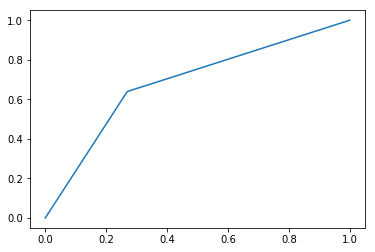

In [171]:
plt.plot(false_positive_rate,true_positive_rate)

In [172]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79     67950
         1.0       0.44      0.64      0.52     22297

    accuracy                           0.71     90247
   macro avg       0.65      0.69      0.66     90247
weighted avg       0.76      0.71      0.72     90247



In [173]:
y_train= pd.DataFrame(Y_train,columns=['Target_ER.Events'])

In [174]:
x_train=pd.DataFrame(X_train, columns=df_col)

In [175]:
import statsmodels.api as sm

In [176]:
stat_logit=sm.Logit(y_train,x_train)

In [177]:
stat_logit.fit().summary()

         Current function value: 0.599834
         Iterations: 35


C:\Users\Jaideep\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Target_ER.Events   No. Observations:               408198
Model:                          Logit   Df Residuals:                   407873
Method:                           MLE   Df Model:                          324
Date:                Mon, 29 Jul 2019   Pseudo R-squ.:                  0.1346
Time:                        13:03:27   Log-Likelihood:            -2.4485e+05
converged:                      False   LL-Null:                   -2.8294e+05
                                        LLR p-value:                     0.000
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
mo11_warfarin                                      0.0137      0.006      2.442      0.015       0.003       0.025
mo9_OFFICE_Cost                                   -0.0031      0.005     -0.630      0.529      -0.013       0.007
mo9_PHARMACY_Cost                              -7.333e-05      0.006     -0.012      0.991      -0.012       0.012
mo12_HIV                                          -0.0030      0.003     -0.853      0.394      -0.010       0.004
mo4_OFFICE_Cost                                    0.0033      0.004      0.745      0.456      -0.005       0.012
mo12_SNF_Cost                                      0.0089      0.004      2.084      0.037       0.001       0.017
mo10_INPATIENT_PSYCHIATRIC_Cost                    0.0129      0.006      2.327      0.020       0.002       0.024
mo3_nitrates                                       0.0028      0.005      0.516      0.606      -0.008       0.013
mo5_INPATIENT_PSYCHIATRIC_Cost                     0.0047      0.005      0.942      0.346      -0.005       0.015
mo11_mtl_ER.Admissions                             0.0351      0.005      7.055      0.000       0.025       0.045
mo4_INPATIENTHOSPITAL_Cost                        -0.0142      0.005     -2.713      0.007      -0.024      -0.004
mo7_mtl_Office.Visits                              0.0188   1.32e+04   1.43e-06      1.000   -2.58e+04    2.58e+04
mo3_SNF_Cost                                      -0.0049      0.004     -1.160      0.246      -0.013       0.003
mo4_SNF_Cost                                      -0.0025      0.004     -0.648      0.517      -0.010       0.005
mo1_PHARMACY_Cost                                 -0.0449      0.029     -1.531      0.126      -0.102       0.013
mo5_INPATIENTHOSPITAL_Cost                        -0.0063      0.004     -1.503      0.133      -0.015       0.002
mo11_opioid                                        0.0030      0.005      0.597      0.550      -0.007       0.013
mo12_Depression                                    0.0389      0.004      8.752      0.000       0.030       0.048
mv_avg_index_Chronic.Diseases                     -0.0052      0.005     -1.130      0.258      -0.014       0.004
mo12_nitrates                                      0.0070      0.005      1.334      0.182      -0.003       0.017
mo6_mtl_ER.Visits                                  0.1356   1.82e+04   7.46e-06      1.000   -3.57e+04    3.57e+04
mo10_URGENT_CARE_Cost                              0.0349      0.005      7.690      0.000       0.026       0.044
mo2_EMERGENCYROOMHOSPITAL_Cost                    -0.0073      0.004     -1.718      0.086      -0.016       0.001
mo12_Osteoporosis.Risk                             0.2582      0.006     45.254      0.000       0.247       0.269
mo9_opioid                                        -0.0096      0.005     -1.865      0.062      -0.020       0.000
mo12_CHF             

# Decision tree from random forest

In [215]:
y_train['Target_ER.Events']=y_train['Target_ER.Events'].astype('category')

In [216]:
y_train['Target_ER.Events'].describe()

count     408198.0
unique         2.0
top            1.0
freq      204099.0
Name: Target_ER.Events, dtype: float64

In [ ]:
y_train['Target_ER.Events'].class

In [227]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [228]:
x_train.shape

(408198, 329)

In [229]:
# Train
model.fit(x_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

C:\Users\Jaideep\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [230]:
rf_pred=model.predict(X_test)

In [231]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, rf_pred)

In [232]:
print(auc(false_positive_rate, true_positive_rate))

0.6371368338917028


### Plotting tree

In [214]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = df_col,
                class_names = ['low risk','high risk'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [200]:
import pydot

In [207]:
temp_df.shape

(360985, 334)

In [208]:
temp2_df=temp_df.copy()

In [209]:
temp2_df=temp2_df.drop('Target_ER.Admissions',axis=1)
temp2_df=temp2_df.drop('Target_ER.Visits',axis=1)
temp2_df=temp2_df.drop('Target_ReAdmissions',axis=1)
temp2_df=temp2_df.drop('Target_Total_Cost',axis=1)

In [210]:
train2_df, test2_df = train_test_split(temp2_df, test_size=0.25)

In [211]:
X_train2=train2_df.loc[:,train2_df.columns!='Target_ER.Events']

In [212]:
Y_train2=train2_df['Target_ER.Events']